An investigation of the time series of the ChrisCo company's website, where the data shows the number of page hits per day.


In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1.Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
data.index = pd.to_datetime(data.index)

print(data.head())
print(data.tail())
print(data.describe())
print(data.sum())

             001  002  003  004  005  006  007  008  009  010  ...  158  159  \
Date                                                           ...             
2019-01-01  1062   33   67   42    0    4    0    0    1   69  ...    0    0   
2019-01-02   976   41   72   19    2    0    0   14    1   62  ...    5    0   
2019-01-03   956   27   71   28    4    6   11    0    0   64  ...    0    0   
2019-01-04   976   30   57   29    0    0    3    0    2   52  ...    0    2   
2019-01-05   956   45   65   27    4    1    0    0    0   55  ...   12    0   

            160  161  162  163  164  165  166  167  
Date                                                
2019-01-01    4    0   10    2    2    2    0    0  
2019-01-02    0    7    0    0    0    0    1    3  
2019-01-03    0    0    6    0    0    3    0    0  
2019-01-04    0    0    0    0    0    0    0    7  
2019-01-05    0    4    0    0    0    0    5    2  

[5 rows x 167 columns]
             001  002  003  004  005  006  0

1. Create an initial exploratory chart showing line plots for all pages.

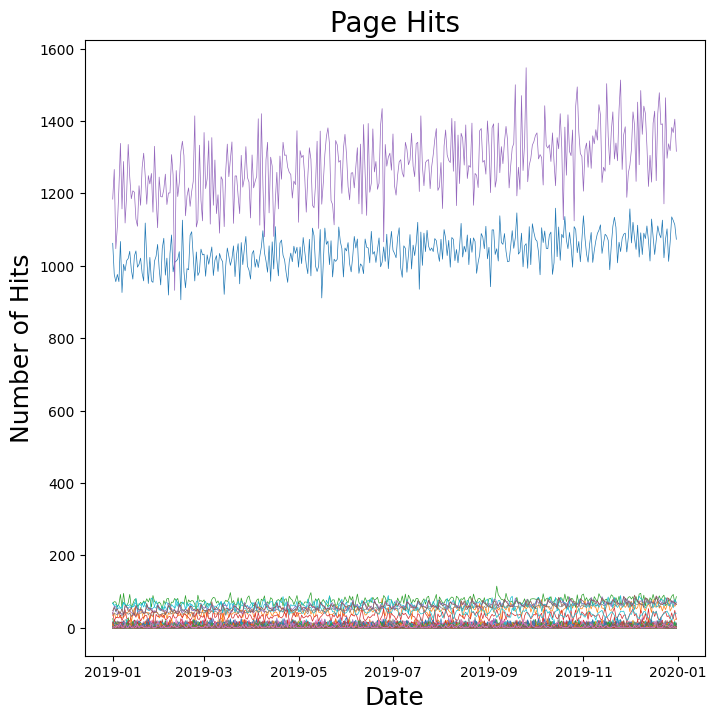

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(data, linewidth=0.5)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Hits', fontsize=18)
plt.title('Page Hits', fontsize=20)
#plt.legend(data.columns, loc=2)
plt.show()

2. The high volume pages are not particularly interesting as most visitors to the site use these. Instead the
company is interested in driving up engagement with the site by getting users to explore further. They want
to focus on medium volume pages, so create a chart showing line plots for these with a legend indicating
which is which.

            002  003  004  010  048  080  155  156
Date                                              
2019-01-01   33   67   42   69   37   67   39   47
2019-01-02   41   72   19   62   39   61   59   56
2019-01-03   27   71   28   64   38   44   58   46
2019-01-04   30   57   29   52   35   61   39   52
2019-01-05   45   65   27   55   45   61   40   41


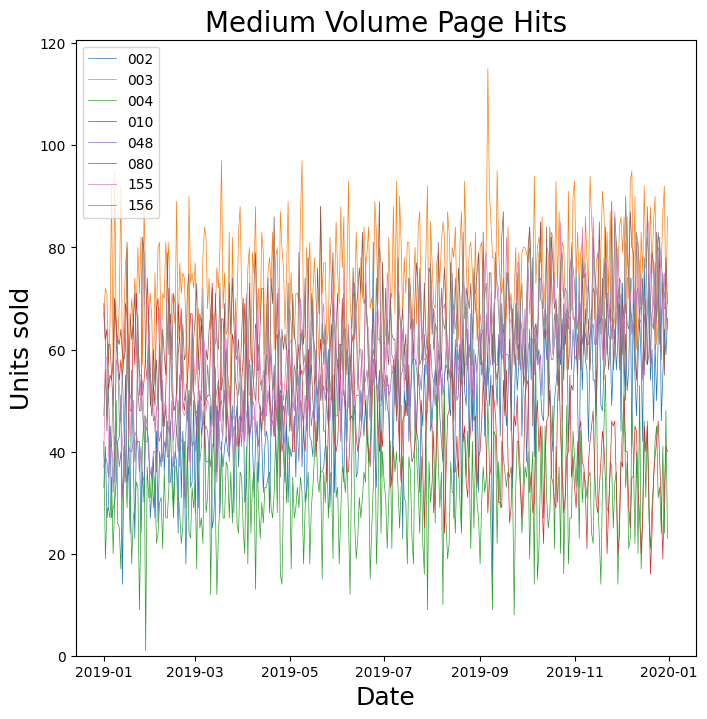

In [ ]:
selected = ['002', '003', '004', '010', '048', '080', '155', '156']
print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Hits', fontsize=18)
plt.title('Medium Volume Page Hits', fontsize=20)
plt.legend(data[selected], loc=2)
plt.show()

3. The previous chart is a little overcrowded, so let's create a further chart for medium volume pages which also
includes a 14-day rolling average for each time series.

            002  003  004  010  048  080  155  156
Date                                              
2019-01-01   33   67   42   69   37   67   39   47
2019-01-02   41   72   19   62   39   61   59   56
2019-01-03   27   71   28   64   38   44   58   46
2019-01-04   30   57   29   52   35   61   39   52
2019-01-05   45   65   27   55   45   61   40   41


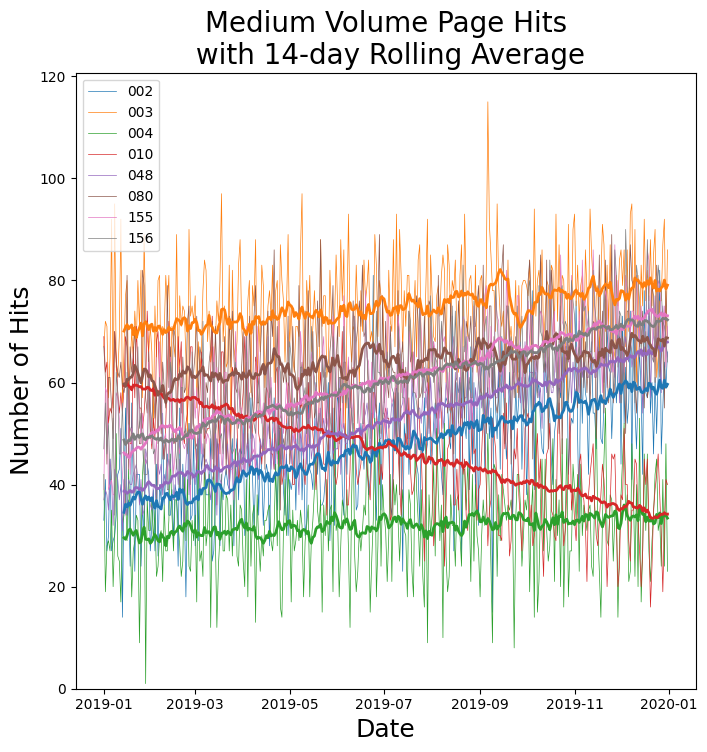

In [ ]:
period = 14
rolling_average = data.rolling(window=period).mean()

selected = ['002', '003', '004', '010', '048', '080', '155', '156']
print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.ylim(ymin=0)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Hits', fontsize=18)
plt.title('Medium Volume Page Hits\n with 14-day Rolling Average', fontsize=20)
plt.legend(data[selected], loc=2)
plt.show()



4. Now let's create a further chart for medium volume pages which also includes a trendline of the original time series with 14-day rolling average.

            002  003  004  010  048  080  155  156
Date                                              
2019-01-01   33   67   42   69   37   67   39   47
2019-01-02   41   72   19   62   39   61   59   56
2019-01-03   27   71   28   64   38   44   58   46
2019-01-04   30   57   29   52   35   61   39   52
2019-01-05   45   65   27   55   45   61   40   41


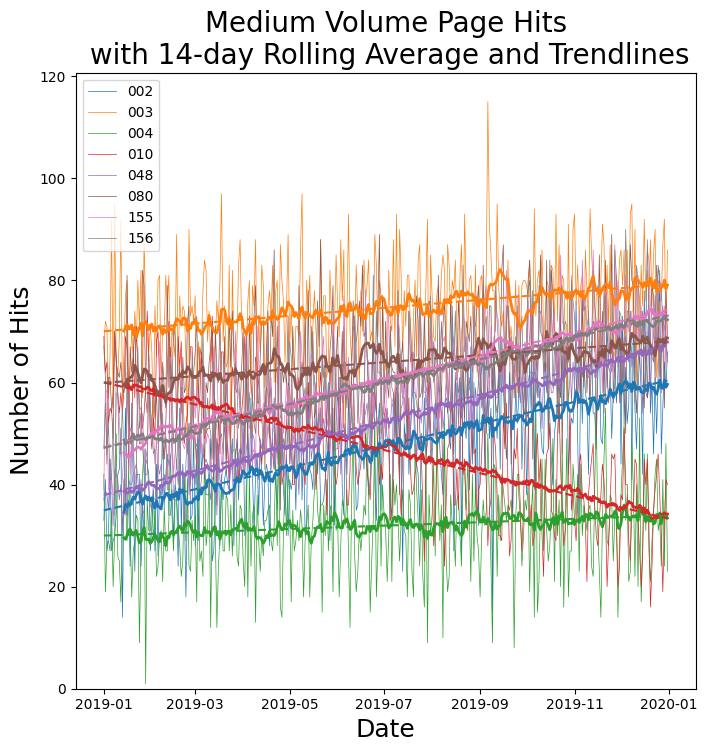

In [ ]:
period = 14
rolling_average = data.rolling(window=period).mean()

selected = ['002', '003', '004', '010', '048', '080', '155', '156']
print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.ylim(ymin=0)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
plt.gca().set_prop_cycle(None)
for name in selected:
  x = np.arange(len(data[name]))
  z = np.polyfit(x, data[name], 1)
  trend = np.poly1d(z)
  plt.plot(data.index, trend(x), linestyle='--')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Hits', fontsize=18)
plt.title('Medium Volume Page Hits\n with 14-day Rolling Average and Trendlines', fontsize=20)
plt.legend(data[selected], loc=2)
plt.show()

5. Finally, to improve plot clarity, let's make three adjustments by slightly reducing the line width of the original time series, changing the trendline to dashed, and manually reordeing selected pages to match the legend's visual order. These tweaks aim to enhance readability and interpretation of the chart.


            003  080  010  156  155  048  002  004
Date                                              
2019-01-01   67   67   69   47   39   37   33   42
2019-01-02   72   61   62   56   59   39   41   19
2019-01-03   71   44   64   46   58   38   27   28
2019-01-04   57   61   52   52   39   35   30   29
2019-01-05   65   61   55   41   40   45   45   27


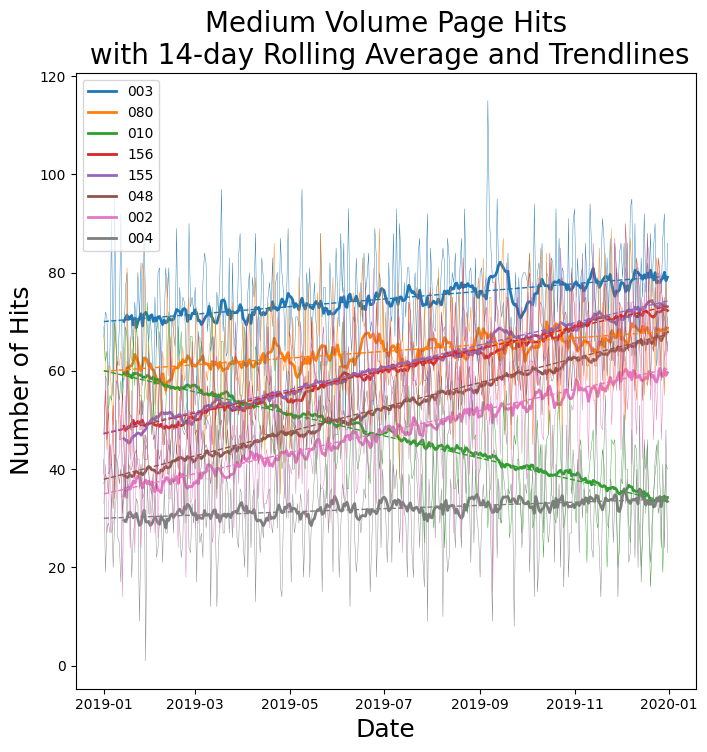

In [ ]:
period = 14
rolling_average = data.rolling(window=period).mean()

selected = ['003', '080', '010', '156', '155', '048', '002', '004']
print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(rolling_average[selected], linewidth=2)
plt.gca().set_prop_cycle(None)
plt.plot(data[selected], linewidth=0.3)
plt.gca().set_prop_cycle(None)
for name in selected:
  x = np.arange(len(data[name]))
  z = np.polyfit(x, data[name], 1)
  trend = np.poly1d(z)
  plt.plot(data.index, trend(x), linestyle='--', linewidth=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Hits', fontsize=18)
plt.title('Medium Volume Page Hits\n with 14-day Rolling Average and Trendlines', fontsize=20)
plt.legend(data[selected], loc=2)
plt.show()